In [81]:
## Tutorial from Machine Learnia youtube channel : https://www.youtube.com/watch?v=vG6tDQc86Rs
## Linear Model

import numpy as np 
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

 # 1. Dataset

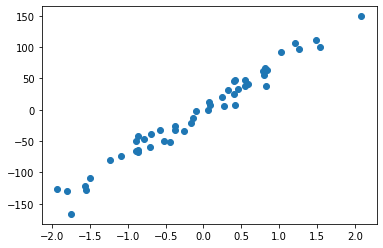

In [82]:
x, y = make_regression(n_samples= 50, n_features=2, noise=10)
plt.scatter(x[:,0], y) # first feature

In [83]:
print(x.shape)
# need to reshape because of the unknown shape return by make_regression function
y = y.reshape(y.shape[0],1) 
print(y.shape)

(50, 2)
(50, 1)


In [84]:
# matrix x
X = np.hstack((x, np.ones((x.shape[0], 1))))
X

array([[ 1.2661408 , -0.36721217,  1.        ],
       [-0.70824996, -1.26616846,  1.        ],
       [-0.3751284 ,  1.03523379,  1.        ],
       [ 0.24293508,  0.80508083,  1.        ],
       [-0.25091542, -1.03341942,  1.        ],
       [ 0.83067394, -1.04776393,  1.        ],
       [ 0.40352532, -2.08171568,  1.        ],
       [-0.377593  ,  0.3524286 ,  1.        ],
       [-1.93552419, -0.20533144,  1.        ],
       [ 0.78482495,  0.69647629,  1.        ],
       [-0.86423945,  0.72390169,  1.        ],
       [-1.56722477, -0.41141822,  1.        ],
       [ 1.02264744,  1.44196678,  1.        ],
       [-0.88960172,  0.68174453,  1.        ],
       [ 0.32808083,  0.06606694,  1.        ],
       [ 0.08812831,  1.33949566,  1.        ],
       [-0.56788817,  1.01549351,  1.        ],
       [-0.69815369, -1.33078922,  1.        ],
       [ 0.83363452,  0.63918702,  1.        ],
       [-0.16950535, -1.86786   ,  1.        ],
       [ 0.55568157,  0.98977396,  1.   

In [85]:
# random initialization of vector theta
theta = np.random.randn(3,1)
print(theta.shape)
print(theta)

(3, 1)
[[-0.11208943]
 [ 2.08578742]
 [ 0.67404234]]


# 2. Model

In [86]:
def model(X, theta):
    return X.dot(theta)

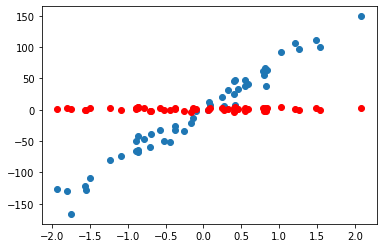

In [87]:
# compare initial model with data (view with the first feature)
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], model(X, theta), c='r')

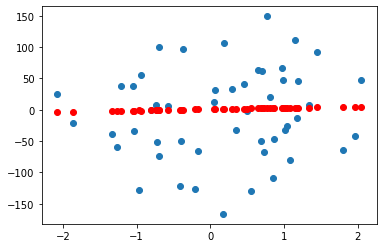

In [88]:
# compare initial model with data (view with the second feature)
plt.scatter(x[:,1], y)
plt.scatter(x[:,1], model(X, theta), c='r')

# 3. Cost function

In [89]:
def cost_function(X, y, theta):
    m= len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [90]:
cost_function(X, y, theta)

2531.4847846488037

# 4. Gradient and Gradient descent

In [91]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [92]:
def gradient_descent(X, y, theta, learning_rate, n_it):
    cost_history = np.zeros(n_it)
    for i in range(0, n_it):
        theta -= learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# 5. Fit the model

In [93]:
theta_final, cost_hist = gradient_descent(X, y, theta, learning_rate=0.01, n_it=500)
theta_final

array([[72.96002772],
       [ 6.39421805],
       [-1.44587337]])

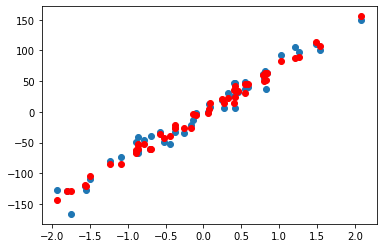

In [94]:
# compare fit model with data
predictions = model(X, theta_final)

#view with the 1st feature
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], predictions, c='r')

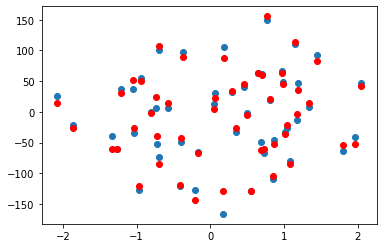

In [95]:
# view with the 2nd feature
plt.scatter(x[:,1], y)
plt.scatter(x[:,1], predictions, c='r')

# 6. Learning curve

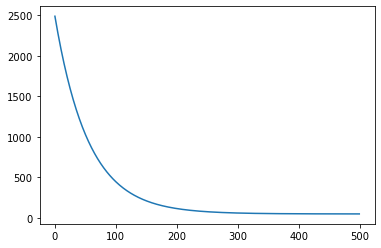

In [96]:
plt.plot(range(500), cost_hist)

# 7. Evaluation with R²

In [97]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [98]:
coef_determination(y, predictions)

0.9795811821974232